In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import importlib

# Speccy
import acf
import psd
import sick_tricks as gary
import utils as ut
import sample

In [9]:
importlib.reload(acf)
importlib.reload(psd)
importlib.reload(gary)
importlib.reload(ut)
importlib.reload(sample);

### Keep Matern problem

In [10]:
n = 1000
delta = .5
tt = delta * np.arange(n)
sigma = 1e-6

params = [1, 5/6+2, 0.1]

### Generate data
Use Gaussian sample and random amplitude sample

/Users/00077063/Documents/PostDoc/20230714_speccy/speccy/notebooks/acf.py:17: RuntimeWarning: invalid value encountered in multiply
  K *= K_nu(nu, np.abs(lmbda * dx))


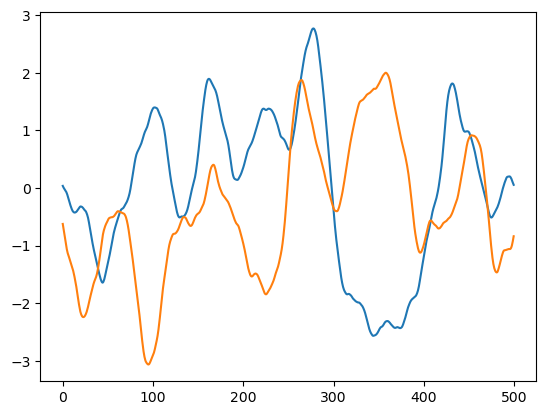

In [11]:
acf_true = acf.matern(tt, params, sigma = sigma);

gauss_sample = sample.mv_gaussian(acf_true)
ra_sample = sample.random_amplitudes(psd.matern, params, n, delta)

plt.plot(tt, ra_sample)
plt.plot(tt, gauss_sample)

### Look at periodograms

(1e-10, 1000.0)

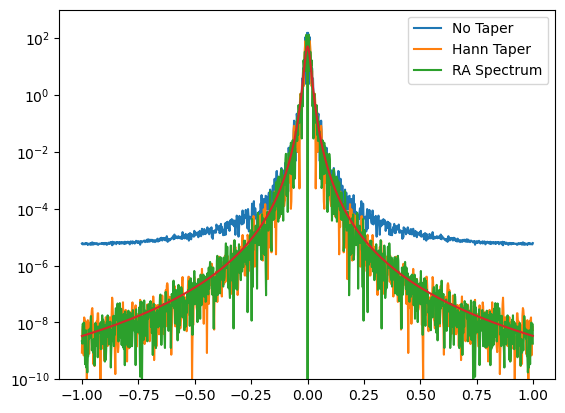

In [12]:
h = signal.windows.hann(n)

ff_taper, I_taper = gary.periodogram(gauss_sample, delta, h)
ff_gauss, I_gauss = gary.periodogram(gauss_sample, delta)
ff_ra, I_ra = gary.periodogram(ra_sample, delta)

plt.plot(ff_gauss, I_gauss, label = "No Taper")
plt.plot(ff_taper, I_taper, label = "Hann Taper")
plt.plot(ff_ra, I_ra, label = "RA Spectrum")
plt.plot(ff_ra, psd.matern(ff_ra, params))
plt.yscale('log')
plt.legend()
plt.ylim(1e-10, 1e3)

### Whittle likelihoods

In [13]:
print("No Taper likelihood = " + str(gary.whittle(gauss_sample, psd.matern, params, delta)))
print("Taper likelihood = " + str(gary.whittle(gauss_sample, psd.matern, params, delta, h)))
print("Debiased likelihood = " + str(gary.dwhittle(gauss_sample, acf.matern, params, delta)))

No Taper likelihood = -275177.13487420767
Taper likelihood = 12907.752319571973
Debiased likelihood = 6672.732409489638
